In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 10
sns.set_context('paper', font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.despine()
sns.set_style("dark")

<Figure size 1008x720 with 0 Axes>

In [3]:
punk_attributes = pd.read_csv('raw_punks.csv')

In [4]:
sales = pd.read_csv('sales.csv')

### Max price DF

In [17]:
current_price = sales.groupby('punk_id').max().sort_values(by='amount_ethereum', ascending=False)

In [18]:
len(current_price)

5622

### Merging

In [19]:
punk_attributes_price = pd.merge(punk_attributes, current_price, left_on='id', right_on='punk_id', how='left')

In [20]:
len(punk_attributes_price)

10000

In [24]:
top_100_punks = punk_attributes_price.sort_values(by='amount_ethereum', ascending=False).head(100)

In [25]:
len(top_100_punks)

100

In [ ]:
###

### Analyzing Traits

In [31]:
# Filling NA's with Empty

top_100_punks['traits'] = top_100_punks['traits'].fillna('No_Trait')

In [32]:
top_100_punks['traits'].isna().sum()

0

In [26]:
# Different traits

gen = list(top_100_punks['traits'])
gen[0]

'Cap Forward,Pipe,Small Shades'

In [34]:
top_100_punks['traits'].str.split(',')

7804                    [Cap Forward, Pipe, Small Shades]
3100                                           [Headband]
6965                                             [Fedora]
2140                          [Knitted Cap, Small Shades]
3011    [Earring, Frown, Normal Beard, Pipe, Small Sha...
                              ...                        
2325                                [Earring, Hoodie, VR]
8066          [Classic Shades, Hot Lipstick, Orange Side]
1348    [3D Glasses, Crazy Hair, Earring, Normal Beard...
1710                  [Classic Shades, Orange Side, Pipe]
6666    [Black Lipstick, Clown Eyes Blue, Earring, Ora...
Name: traits, Length: 100, dtype: object

##### GEtting unique trait values

In [35]:
all_traits = []

In [36]:
for x in top_100_punks.traits:
    all_traits.extend(x.split(','))

In [38]:
all_traits

['Cap Forward',
 'Pipe',
 'Small Shades',
 'Headband',
 'Fedora',
 'Knitted Cap',
 'Small Shades',
 'Earring',
 'Frown',
 'Normal Beard',
 'Pipe',
 'Small Shades',
 'Vampire Hair',
 'Bandana',
 'Cap',
 'No_Trait',
 'Cigarette',
 'Nerd Glasses',
 'Top Hat',
 'Knitted Cap',
 'Crazy Hair',
 'Frown',
 'Classic Shades',
 'Wild Hair',
 'Cigarette',
 'Earring',
 'Mohawk Thin',
 'Messy Hair',
 'Shadow Beard',
 'Do-rag',
 'Eye Patch',
 'Shadow Beard',
 'Bandana',
 'Cigarette',
 'Earring',
 'Handlebars',
 'Cigarette',
 'Earring',
 'Rosy Cheeks',
 'Do-rag',
 'Earring',
 'Cigarette',
 'Earring',
 'Knitted Cap',
 'Mustache',
 'Nerd Glasses',
 'Smile',
 'Big Shades',
 'Crazy Hair',
 'Earring',
 'Bandana',
 'Earring',
 'Frown',
 'Beanie',
 'Cap',
 'Clown Eyes Blue',
 'Beanie',
 'Shadow Beard',
 'Beanie',
 'Earring',
 'Nerd Glasses',
 'Pipe',
 'Beanie',
 'Nerd Glasses',
 'Beanie',
 'Earring',
 'Luxurious Beard',
 '3D Glasses',
 'Beanie',
 'Muttonchops',
 'No_Trait',
 'Beanie',
 'Earring',
 'Luxurious 

In [43]:
traits_100punks = pd.unique(all_traits)
traits_100punks

array(['Cap Forward', 'Pipe', 'Small Shades', 'Headband', 'Fedora',
       'Knitted Cap', 'Earring', 'Frown', 'Normal Beard', 'Vampire Hair',
       'Bandana', 'Cap', 'No_Trait', 'Cigarette', 'Nerd Glasses',
       'Top Hat', 'Crazy Hair', 'Classic Shades', 'Wild Hair',
       'Mohawk Thin', 'Messy Hair', 'Shadow Beard', 'Do-rag', 'Eye Patch',
       'Handlebars', 'Rosy Cheeks', 'Mustache', 'Smile', 'Big Shades',
       'Beanie', 'Clown Eyes Blue', 'Luxurious Beard', '3D Glasses',
       'Muttonchops', 'Horned Rim Glasses', 'Regular Shades',
       'Hot Lipstick', 'Orange Side', 'Hoodie', 'Pilot Helmet',
       'Purple Lipstick', 'Cowboy Hat', 'Peak Spike', 'Gold Chain',
       'Chinstrap', 'VR', 'Stringy Hair', 'Black Lipstick',
       'Purple Eye Shadow', 'Tiara', 'Mole', 'Spots',
       'Straight Hair Blonde', 'Welding Goggles', 'Wild Blonde',
       'Normal Beard Black', 'Vape', 'Choker', 'Half Shaved',
       'Clown Hair Green', 'Clown Nose', 'Medical Mask', 'Red Mohawk',
       '

In [44]:
len(traits_100punks)

66

In [46]:
cero_matriz = np.zeros((len(top_100_punks), len(traits_100punks)))

In [47]:
dummies = pd.DataFrame(cero_matriz, columns=traits_100punks)
dummies

,Cap Forward,Pipe,Small Shades,Headband,Fedora,Knitted Cap,Earring,Frown,Normal Beard,Vampire Hair,...,Vape,Choker,Half Shaved,Clown Hair Green,Clown Nose,Medical Mask,Red Mohawk,Silver Chain,Pigtails,Green Eye Shadow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
gen = top_100_punks.traits
gen

7804                        Cap Forward,Pipe,Small Shades
3100                                             Headband
6965                                               Fedora
2140                             Knitted Cap,Small Shades
3011    Earring,Frown,Normal Beard,Pipe,Small Shades,V...
                              ...                        
2325                                    Earring,Hoodie,VR
8066              Classic Shades,Hot Lipstick,Orange Side
1348     3D Glasses,Crazy Hair,Earring,Normal Beard Black
1710                      Classic Shades,Orange Side,Pipe
6666    Black Lipstick,Clown Eyes Blue,Earring,Orange ...
Name: traits, Length: 100, dtype: object

##### Filling dummies matrix with indices

In [55]:
for i, gen in enumerate(top_100_punks.traits):
    indices = dummies.columns.get_indexer(gen.split(','))
    dummies.iloc[i, indices] = 1

In [56]:
dummies

,Cap Forward,Pipe,Small Shades,Headband,Fedora,Knitted Cap,Earring,Frown,Normal Beard,Vampire Hair,...,Vape,Choker,Half Shaved,Clown Hair Green,Clown Nose,Medical Mask,Red Mohawk,Silver Chain,Pigtails,Green Eye Shadow
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0, 0.5, 'Cantidad de repeticiones')

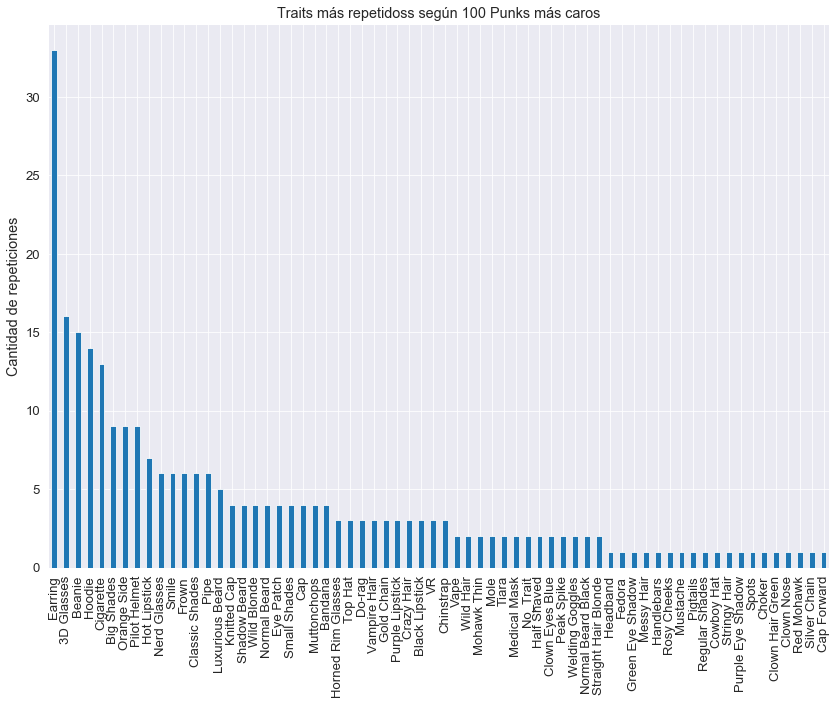

In [73]:
g = dummies.sum().sort_values(ascending=False).plot(kind='bar', grid=True)
g.set_title('Traits más repetidoss según 100 Punks más caros')
g.set_ylabel('Cantidad de repeticiones')

##### Precio

Text(0, 0.5, 'Precio medio ETH')

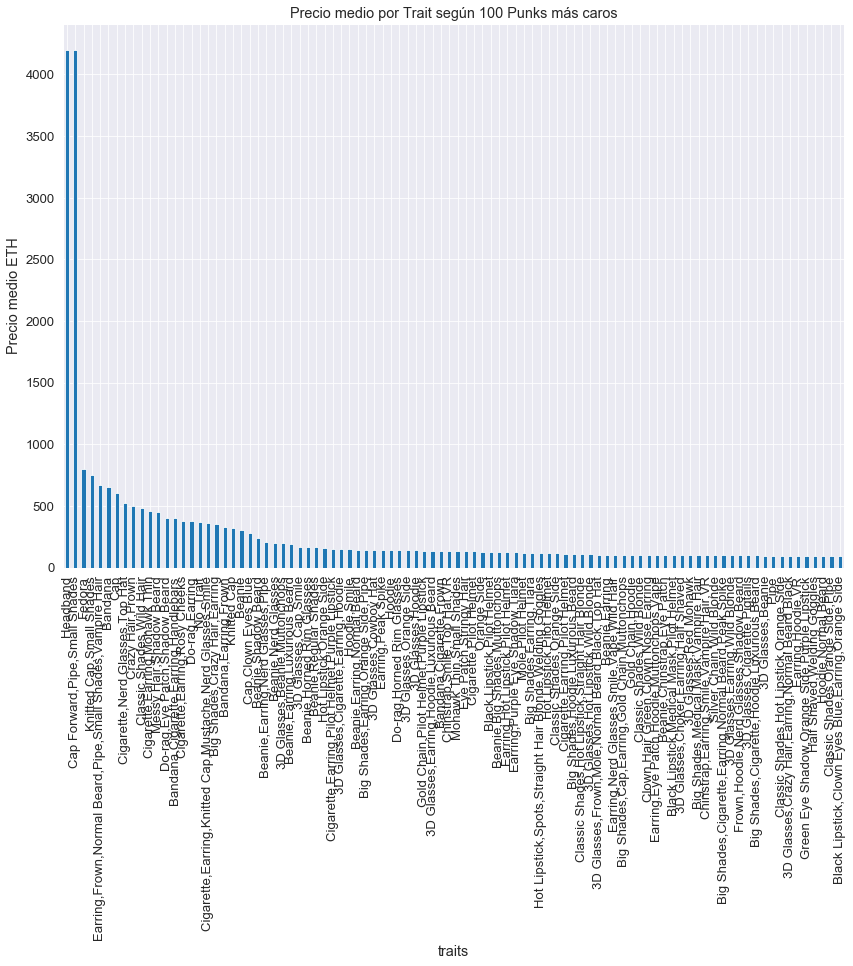

In [80]:
g = top_100_punks.groupby('traits').mean()['amount_ethereum'].sort_values(ascending=False).plot(kind='bar', grid=True)
g.set_title('Precio medio por Trait según 100 Punks más caros')
g.set_ylabel('Precio medio ETH')

# Type

Text(0, 0.5, 'Cantidad de repeticiones')

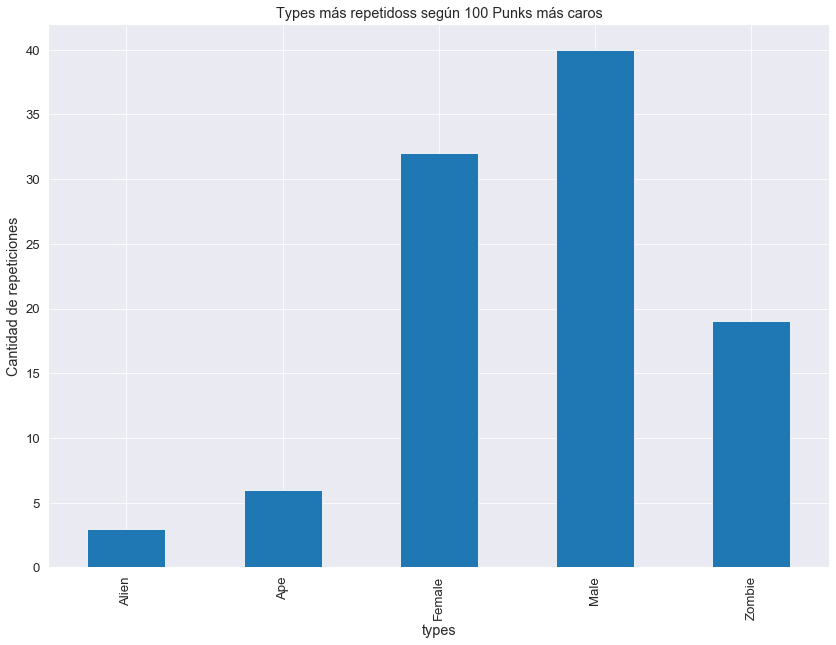

In [74]:
g = top_100_punks.groupby('types').count()['id'].plot(kind='bar', grid=True)
g.set_title('Types más repetidoss según 100 Punks más caros')
g.set_ylabel('Cantidad de repeticiones')

### Precio

Text(0, 0.5, 'Precio medio ETH')

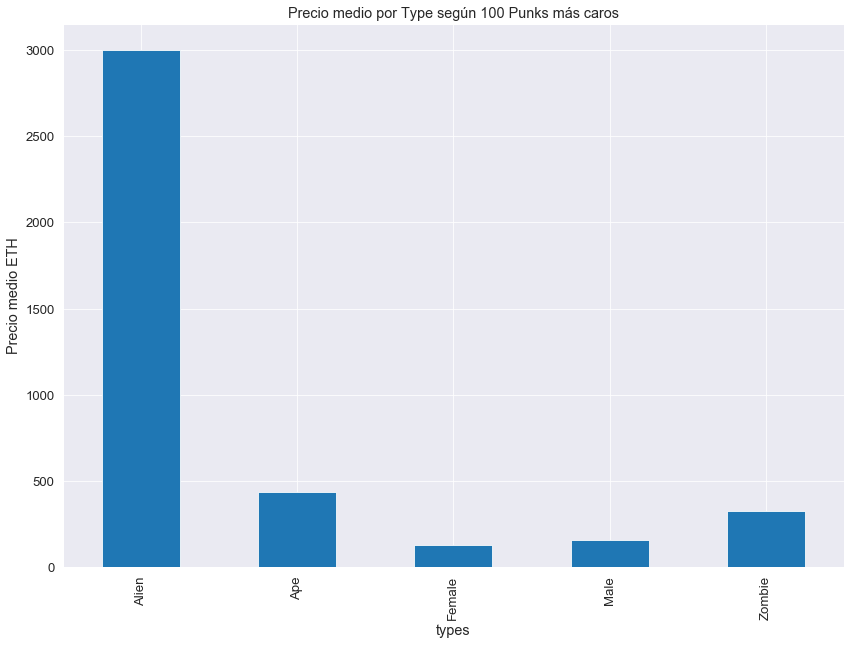

In [77]:
g = top_100_punks.groupby('types').mean()['amount_ethereum'].plot(kind='bar', grid=True)
g.set_title('Precio medio por Type según 100 Punks más caros')
g.set_ylabel('Precio medio ETH')

# Skin

##### Catntidades

Text(0, 0.5, 'Cantidad de repeticiones')

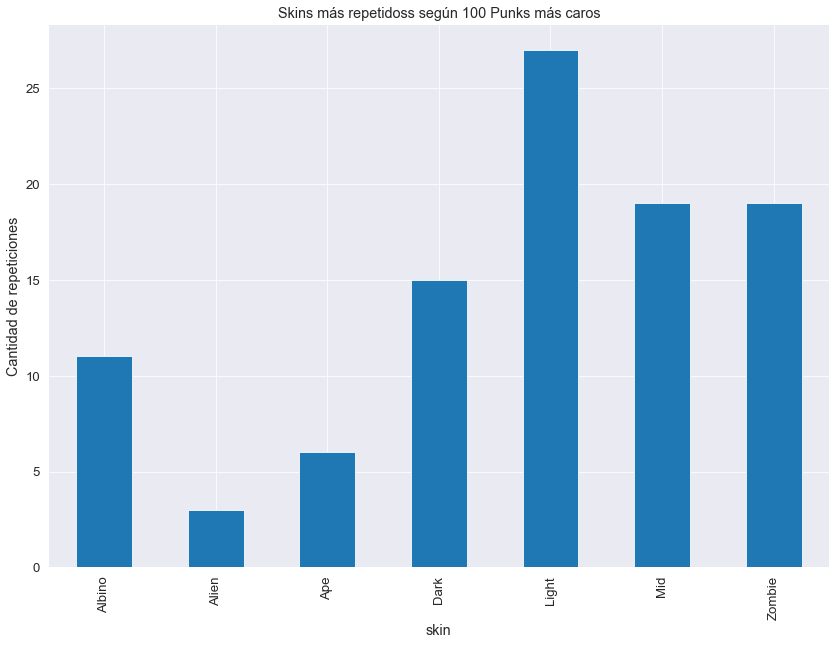

In [75]:
g = top_100_punks.groupby('skin').count()['id'].plot(kind='bar', grid=True)
g.set_title('Skins más repetidoss según 100 Punks más caros')
g.set_ylabel('Cantidad de repeticiones')

##### Precio

Text(0, 0.5, 'Precio medio ETH')

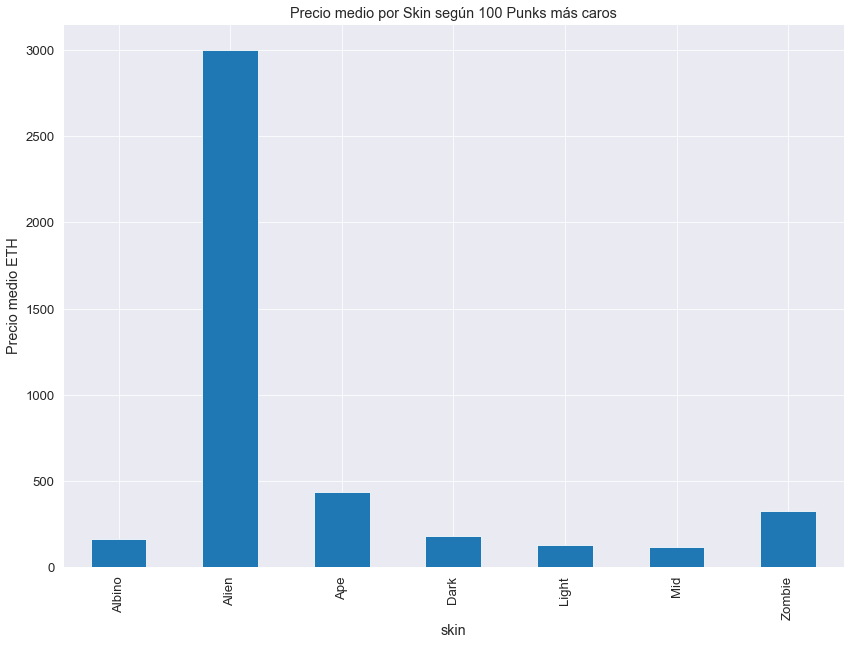

In [76]:
g = top_100_punks.groupby('skin').mean()['amount_ethereum'].plot(kind='bar', grid=True)
g.set_title('Precio medio por Skin según 100 Punks más caros')
g.set_ylabel('Precio medio ETH')

In [ ]:
##